In [1]:
import sys
# !pip install Python-EasyGraph
# !pip list
import warnings
import easygraph as eg
import csv
from __future__ import print_function
import time

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from easygraph.functions.community import modularity, greedy_modularity_communities
import torch
from easygraph.functions.graph_embedding import *
from sklearn.manifold import TSNE
print(sys.path)
warnings.filterwarnings('ignore')

['/Users/yizhihenpidehou/Desktop/fdu/eg/Easy-Graph/easygraph/functions/graph_embedding', '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages/pke-2.0.0-py3.9.egg', '/usr/local/lib/python3.9/site-packages/Unidecode-1.3.4-py3.9.egg', '/usr/local/lib/python3.9/site-packages/matplotlib-3.3.4-py3.9-macosx-12-x86_64.egg', '/usr/local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages/IPython/extensions', '/Users/yizhihenpidehou/.ipython']


In [2]:
dataset = eg.CiteseerGraphDataset(force_reload=True) # Download CiteseerGraphDataset contained in EasyGraph
num_classes = dataset.num_classes
g = dataset[0]
labels = g.ndata['label']

buildin url: https://data.dgl.ai/dataset/citeseer.zip
Finished data loading and preprocessing.
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.


Graph embedding via DeepWalk

In [3]:
deepwalk_emb, _ = deepwalk(g, dimensions=32, walk_length=50, num_walks=20)
dw_emb = []
for i in range(0, len(deepwalk_emb)):
    dw_emb.append(list(deepwalk_emb[i]))
dw_emb = np.array(dw_emb)
print(dw_emb)

Walk iteration:


100%|██████████| 20/20 [00:02<00:00,  6.97it/s]


[[-1.199879   -2.2553606  -0.30192557 ...  0.7513896   1.3564302
  -0.0603863 ]
 [-1.4205838  -4.3719144  -2.6884024  ... -0.16302297  0.7301015
  -1.345141  ]
 [ 0.10947595 -1.7343473  -0.5305052  ... -2.7578452  -0.4442701
   2.7859106 ]
 ...
 [-1.4156665  -1.1131554   0.9701555  ...  0.6622496   0.5437359
   0.9686273 ]
 [ 0.23948225 -2.3172      0.55823845 ... -2.1616578   1.1059347
  -0.97667825]
 [ 0.11451026 -0.21045467 -0.30176896 ... -1.4374914  -0.0162374
  -0.0680043 ]]


In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(dw_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('deepwalk_citesee.pdf', bbox_inches='tight')
plt.show()

Graph embedding via Node2Vec

100%|██████████| 10/10 [00:02<00:00,  4.65it/s]


[[ 1.6976625  -2.207844    2.9809065  ... -1.3460357   1.3365552
  -0.77196413]
 [ 0.13421963 -0.55998075  2.9920888  ...  0.29930067  3.1005337
  -0.54186416]
 [ 0.0783411  -0.15019979  0.8058853  ... -1.7781498   0.6219629
  -1.0519089 ]
 ...
 [-0.78444314  0.12074073  1.94064    ... -1.3589685  -1.4400711
   1.1418875 ]
 [-0.66155624 -0.3863162   2.4738889  ... -2.2865462   0.06281499
  -0.26182595]
 [ 0.8287675   0.09513299  0.06949124 ... -0.47009778  0.58568305
   0.89894074]]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327
[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 2.106926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.085297


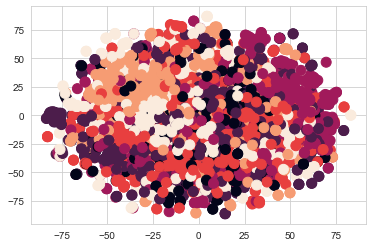

In [4]:
node2vec_emb, _ = node2vec(g, dimensions=32, walk_length=30, num_walks=10, p=0.25, q=4)
n2v_emb = []
for i in range(0, len(node2vec_emb)):
    n2v_emb.append(list(node2vec_emb[i]))
n2v_emb = np.array(n2v_emb)
print(n2v_emb)

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(n2v_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('n2v_citesee.pdf', bbox_inches='tight')
plt.show()

Graph embedding via LINE

In [6]:
model = LINE(g, embedding_size=32, order='second')
model.train(batch_size=64, epochs=1, verbose=2)
line_emb = model.get_embeddings()

l_emb = []
for i in range(0, len(line_emb)):
    l_emb.append(list(line_emb[i]))
l_emb = np.array(l_emb)
print(l_emb)

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(l_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('line_citesee.pdf', bbox_inches='tight')
plt.show()

AttributeError: 'LINE' object has no attribute 'is_multigraph'

Graph embedding via SDNE

In [ ]:
model = SDNE(g, hidden_size=[128, 32])
model.train(batch_size=32, epochs=40, verbose=2)
sdne_emb = model.get_embeddings()


sd_emb = []
for i in range(0, len(sdne_emb)):
    sd_emb.append(list(sdne_emb[i]))
sd_emb = np.array(sd_emb)
print(sd_emb)

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(sd_emb)
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('sdne_citesee.pdf', bbox_inches='tight')
plt.show()